# Conexão com drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Atividade 1: Remoção de comentários do BTGPactual

Este processo é essencial pois não queremos uma seleção enviada no pré processamento, e entendemos que os comentários do Instagram do BTG Pactual não irá comentar de forma negativa nenhuma de duas postagens.

### 1.1.1. Setup

In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from textblob import TextBlob
import emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import unidecode
from enelvo.normaliser import Normaliser
import matplotlib.pyplot as plt


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Pandas: é uma biblioteca de análise de dados em Python que oferece estruturas de dados e ferramentas para manipulação e análise de dados. Com o Pandas, é possível ler, escrever e manipular dados em diversos formatos, como CSV, Excel, SQL, etc. Ele oferece uma grande quantidade de funcionalidades para trabalhar com dados em Python, incluindo a capacidade de filtrar, agregar, reorganizar e transformar dados de várias maneiras.

TextBlob: é uma biblioteca de processamento de linguagem natural em Python. Ela oferece uma interface simples para tarefas comuns de NLP, como análise de sentimentos, correção ortográfica, extração de frases-chave e classificação de texto. O TextBlob é construído sobre a biblioteca NLTK (Natural Language Toolkit) e oferece uma sintaxe fácil de usar para muitas tarefas de processamento de linguagem natural. É uma biblioteca muito útil para análise de texto em Python.

Emoji: é uma biblioteca Python que permite a conversão de emojis de texto para representações de texto Unicode e vice-versa. Além disso, fornece funções úteis para trabalhar com emojis, como contar o número de emojis em uma string, remover todos os emojis de uma string e substituir cada emoji em uma string por um texto de substituição especificado.

Re: A biblioteca "re" é uma ferramenta para trabalhar com expressões regulares, permitindo a extração e manipulação de informações de forma eficiente. 

Unidecode: Unicode é um padrão de codificação de caracteres de forma universal para a representação de caracteres de todas as línguas escritas, bem como símbolos matemáticos, musicais, entre outros.

Enelvo.normaliser: A enelvo.normaliser é uma biblioteca específica para normalização de texto em português. Ela oferece recursos para corrigir erros de digitação, converter abreviações e substituir palavras informais por suas formas mais corretas. A função principal dessa biblioteca é auxiliar na normalização de texto, tornando-o mais padronizado e compreensível.

Numpy (np): A biblioteca numpy fornece estruturas de dados eficientes para manipulação e cálculos numéricos, além de funções matemáticas de alto desempenho.

Sklearn.feature_extraction.text.CountVectorizer: É uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de tokens. Cada documento é representado por um vetor onde cada elemento é o número de ocorrências de um token específico no documento.

Keras.preprocessing.text.Tokenizer: É uma classe do Keras que é usada para pré-processamento de texto. Ela converte texto em sequências de números inteiros (índices de palavras) ou matrizes esparsas. Também oferece recursos como tokenização, vetorização e indexação de palavras.

Nltk.tokenize.word_tokenize: É uma função do NLTK (Natural Language Toolkit) que divide um texto em uma lista de palavras ou tokens. É uma forma de tokenização que leva em consideração o contexto linguístico para separar as palavras.

### 1.1.2. Lendo CSV

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/BaseBTG.csv')

In [ ]:
#retirando aspas dos nomes das colunas
base_rename = base.rename(columns=lambda x: re.sub('[\"\']', '', x))

### 1.1.2.1. Anonimização

In [ ]:
# Criar um dicionário para mapear cada autor ao seu identificador numérico
autores = base_rename['autor'].unique()
mapeamento = {autor: i+1 for i, autor in enumerate(autores)}

# Adicionar uma nova coluna com o identificador numérico
base_rename['autor_anonimo'] = base_rename['autor'].map(mapeamento)

# Salvar o dataframe com a nova coluna
base_rename.to_csv('/content/drive/MyDrive/PROJETO BTG/BaseBTG.csv', index=False)

### 1.1.2.2. Teste da Anonimização

In [ ]:
base_rename['autor_anonimo']

0           1
1           2
2           3
3           4
4           5
         ... 
12350    4003
12351     697
12352    5838
12353    5103
12354    5839
Name: autor_anonimo, Length: 12355, dtype: int64

## 1.2. Formatação de Data

In [ ]:
base_rename['dataPublicada']

0        "2022-03-04 09:38:00"
1        "2022-03-04 09:29:00"
2        "2022-03-04 09:20:00"
3        "2022-03-04 08:36:00"
4        "2022-03-03 21:10:00"
                 ...          
12350    "2022-11-30 11:51:00"
12351    "2022-11-30 12:25:00"
12352    "2022-11-30 12:18:00"
12353    "2022-11-30 12:50:00"
12354    "2022-11-30 14:27:00"
Name: dataPublicada, Length: 12355, dtype: object

In [ ]:
# Remover as aspas duplas da coluna 'dataPublicada'
base_rename['dataPublicada'] = base_rename['dataPublicada'].apply(lambda x: x.replace('"', ''))

# Imprimir a coluna 'dataPublicada' sem as aspas duplas
print(base_rename['dataPublicada'])

0        2022-03-04 09:38:00
1        2022-03-04 09:29:00
2        2022-03-04 09:20:00
3        2022-03-04 08:36:00
4        2022-03-03 21:10:00
                ...         
12350    2022-11-30 11:51:00
12351    2022-11-30 12:25:00
12352    2022-11-30 12:18:00
12353    2022-11-30 12:50:00
12354    2022-11-30 14:27:00
Name: dataPublicada, Length: 12355, dtype: object


In [ ]:
# Converter a coluna 'data' para o formato de data
base_rename['dataPublicada'] = pd.to_datetime(base_rename['dataPublicada'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verificar se existem valores válidos na coluna 'dataPublicada'
if base_rename['dataPublicada'].notna().any():
    # Obter a data atual
    data_atual = pd.Timestamp.now().normalize()

    # Calcular a diferença entre cada data na coluna e a data atual
    base_rename['diferenca'] = abs(base_rename['dataPublicada'] - data_atual)

    # Verificar se existem valores válidos na coluna 'diferenca'
    if base_rename['diferenca'].notna().any():
        # Encontrar a data com a menor diferença
        data_mais_proxima = base_rename['dataPublicada'].loc[base_rename['diferenca'].idxmin()]

        print("A data mais próxima do dia atual é:", data_mais_proxima)
    else:
        print("Não há valores válidos na coluna 'diferenca'.")
else:
    print("Não há valores válidos na coluna 'dataPublicada'.")


A data mais próxima do dia atual é: 2022-11-30 14:27:00


Buscando três meses antes do último registro do DataFrame

In [ ]:
# Calcular a data três meses antes da data mais próxima
data_tres_meses_antes = data_mais_proxima - pd.DateOffset(months=3)

# Filtrar apenas as datas que são três meses antes da data mais próxima
datas_filtradas = base_rename.loc[base_rename['dataPublicada'] >= data_tres_meses_antes]

print("Datas três meses antes da data mais próxima:")
print(datas_filtradas['dataPublicada'])

Datas três meses antes da data mais próxima:
8323    2022-08-30 14:37:00
8324    2022-08-30 15:11:00
8325    2022-08-30 16:35:00
8326    2022-08-30 16:50:00
8327    2022-08-30 17:15:00
                ...        
12350   2022-11-30 11:51:00
12351   2022-11-30 12:25:00
12352   2022-11-30 12:18:00
12353   2022-11-30 12:50:00
12354   2022-11-30 14:27:00
Name: dataPublicada, Length: 4032, dtype: datetime64[ns]


In [ ]:
# Criar um novo DataFrame com as colunas que atendem à regra
dados = base_rename[base_rename['dataPublicada'] >= data_tres_meses_antes][['dataPublicada', 'autor_anonimo', 'texto', 'sentimento']].copy()

### 1.1.2. Teste Isolado

In [ ]:
dados

,dataPublicada,autor_anonimo,texto,sentimento
8323,2022-08-30 14:37:00,697,Quer visualizar o saldo de todas as suas conta...,NEGATIVE
8324,2022-08-30 15:11:00,173,Preços excelentes na hora de investir em boas ...,POSITIVE
8325,2022-08-30 16:35:00,4120,Onde consigo realizar uma simulação de seguro ...,POSITIVE
8326,2022-08-30 16:50:00,4121,Taxa adm alta e ainda taxa de performance num ...,NEUTRAL
8327,2022-08-30 17:15:00,3295,🔥 Faça parte do clube de vantagens BTG. 💯 👉🏻 ...,POSITIVE
...,...,...,...,...
12350,2022-11-30 11:51:00,4003,Uma noite de encontros e muito conhecimento on...,NEUTRAL
12351,2022-11-30 12:25:00,697,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL
12352,2022-11-30 12:18:00,5838,Estou muito grato por todo o esforço que você ...,POSITIVE
12353,2022-11-30 12:50:00,5103,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL


### 1.1.3. Definição de Função

Função de remoção de autor

In [ ]:
def filtrar_dados_por_autor(dados, autor_anonimo):
    # Converter a coluna 'autor_anonimo' para o tipo string
    dados['autor_anonimo'] = dados['autor_anonimo'].astype(str)
    
    # Filtrar os dados por autor, removendo as linhas em que a coluna 'autor_anonimo' contém a string passada como parâmetro
    # Substituir os valores nulos (NaN) da coluna 'autor_anonimo' por 'desconhecido'
    dados_anonimos = dados[~dados['autor_anonimo'].str.contains(autor_anonimo, na=False)]
    
    return dados_anonimos

#### 1.1.3.1. Testes da Função de Remoção de autor

In [ ]:
dados_filtrados = filtrar_dados_por_autor(dados, 'autor_anonimo')
dados_filtrados

,dataPublicada,autor_anonimo,texto,sentimento
8323,2022-08-30 14:37:00,697,Quer visualizar o saldo de todas as suas conta...,NEGATIVE
8324,2022-08-30 15:11:00,173,Preços excelentes na hora de investir em boas ...,POSITIVE
8325,2022-08-30 16:35:00,4120,Onde consigo realizar uma simulação de seguro ...,POSITIVE
8326,2022-08-30 16:50:00,4121,Taxa adm alta e ainda taxa de performance num ...,NEUTRAL
8327,2022-08-30 17:15:00,3295,🔥 Faça parte do clube de vantagens BTG. 💯 👉🏻 ...,POSITIVE
...,...,...,...,...
12350,2022-11-30 11:51:00,4003,Uma noite de encontros e muito conhecimento on...,NEUTRAL
12351,2022-11-30 12:25:00,697,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL
12352,2022-11-30 12:18:00,5838,Estou muito grato por todo o esforço que você ...,POSITIVE
12353,2022-11-30 12:50:00,5103,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL


# Atividade 3: Descrição de emojis de Emojis

### 3.1.2. Descrição da função

In [ ]:
# define a função de remoção de emojis
def removeEmoji():
    remove_emoji = lambda x: emoji.demojize(str(x)).replace(":", "").strip()
    return remove_emoji

### 3.1.3. Teste da função

In [ ]:
# aplica a função à coluna "texto" do DataFrame

dados['textoLimpo'] = dados_filtrados['texto'].apply(removeEmoji())
dados['textoLimpo']

8323     Quer visualizar o saldo de todas as suas conta...
8324     Preços excelentes na hora de investir em boas ...
8325     Onde consigo realizar uma simulação de seguro ...
8326     Taxa adm alta e ainda taxa de performance num ...
8327     fire Faça parte do clube de vantagens BTG. hun...
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforço que você ...
12353    "backhand_index_pointing_rightGUADAKAN está ch...
12354    @btgpactual pq o morning call não está mais ap...
Name: textoLimpo, Length: 4032, dtype: object

# Atividade 4: Remoção de pontuações e acentos.

### 4.1.1.Definição da função remove caracteres especiais

Foi utilizado o parâmetro [^\w\s] para localizar e substituir caracteres não alfanuméricos em uma string.

In [ ]:
def removeCaracteres(text):
    if isinstance(text, str):# verifica se o que está sendo processado é uma string
        return re.sub(r'[^\w\s]', '', text)#substituir todos os caracteres especiais por uma string vazia 
    else:
        return text
# define a função de remoção de caracteres
remove_caracteres = lambda x: removeCaracteres(str(x))

### 4.1.2. Teste da função remove caracteres

In [ ]:
# aplica a função à coluna "textoLimpo" do DataFrame
dados['textoLimpo'] = dados['textoLimpo'].apply(remove_caracteres)
dados['textoLimpo']

8323     Quer visualizar o saldo de todas as suas conta...
8324     Preços excelentes na hora de investir em boas ...
8325     Onde consigo realizar uma simulação de seguro ...
8326     Taxa adm alta e ainda taxa de performance num ...
8327     fire Faça parte do clube de vantagens BTG hund...
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforço que você ...
12353    backhand_index_pointing_rightGUADAKAN está che...
12354    btgpactual pq o morning call não está mais apa...
Name: textoLimpo, Length: 4032, dtype: object

### 4.1.3.Definição da função retira acentos

 A função unidecode.unidecode(x) é utilizada para remover caracteres acentuados e outros caracteres especiais de strings.

In [ ]:
# define a função de remoção de acentos
def removeAcentos(x):
    return unidecode.unidecode(x) if isinstance(x, str) else x

### 4.1.4. Teste da função retira acentos

In [ ]:
# aplica a função à coluna "textoLimpo" do DataFrame
dados['textoLimpo'] = dados['textoLimpo'].apply(removeAcentos)
dados['textoLimpo']

8323     Quer visualizar o saldo de todas as suas conta...
8324     Precos excelentes na hora de investir em boas ...
8325     Onde consigo realizar uma simulacao de seguro ...
8326     Taxa adm alta e ainda taxa de performance num ...
8327     fire Faca parte do clube de vantagens BTG hund...
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforco que voce ...
12353    backhand_index_pointing_rightGUADAKAN esta che...
12354    btgpactual pq o morning call nao esta mais apa...
Name: textoLimpo, Length: 4032, dtype: object

# Atividade 5: Conversão de gírias e abreviações

## 5.1.1. Teste Isolado que remove as gírias e abreviações

In [ ]:
norm = Normaliser(tokenizer='readable')

mensagem = 'Até hj vc n me respondeu. Oq aconteceu?'
resposta = norm.normalise(mensagem)
print(resposta)

até hoje você não me respondeu . o que aconteceu ?


## 5.1.2. Definição da Função de remoção das gírias e abreviações

In [ ]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'você',
    'vcs':'você',
    'Vc': 'você',
    'pq': 'porque',
    'tbm': 'também',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cadê',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'já',
    'naum': 'não',
    'ta': 'está',
    'eh': 'é',
    'vlw': 'valeu',
    'p': 'para',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    'agr': 'agora'
    }

# Conjunto de palavras a serem desconsideradas encontradas em pré-processamento exploratório
palavras_desconsideradas = {
    "warrenbrasil", "sportainmetâ", "sportainmentâ", "hubstage", "kaletsky", "scandiuzzi", "futofmoney",
    "disclaimer", "astraoficialbr", "furnasenergia", "alelobrasil", "bancodaycoval", "grupohagana",
    "steinwaybrasil", "joseavillez", "dianaroth", "beachtennis", "alliancejjteam", "fabiogurgel",
    "masterjacare", "gigipaivabjj", "clubefiinews", "mouratoglou", "octocapitalbr"}

# Função para normalizar o texto substituindo gírias e abreviações
def normalizar_texto(texto):
    palavras = texto.split()
    palavras_normalizadas = []
    
    for palavra in palavras:
        # Verificar se a palavra está no conjunto de palavras desconsideradas ou é igual a "criptomoedas"
        if palavra in palavras_desconsideradas or palavra == 'criptomoedas':
            # Se for uma palavra desconsiderada, adicionar à lista sem fazer alterações
            palavras_normalizadas.append(palavra)
        else:
            # Caso contrário, substituir gírias e abreviações normalmente
            palavra_normalizada = dicionario_girias.get(palavra, palavra)
            palavras_normalizadas.append(palavra_normalizada)
    
    texto_normalizado = ' '.join(palavras_normalizadas)
    
    return texto_normalizado

# Aplicar a função de normalização na coluna "textoLimpo" do DataFrame
dados['texto_normalizado'] = dados['textoLimpo'].apply(normalizar_texto)

## 5.1.3. Teste da Função que remove as gírias e abreviações

In [ ]:
#Frase original
print(dados['texto'].iloc[104])
#Frase normalizada com a remoção de abreviações
print(dados['texto_normalizado'].iloc[104], "\n")

#Frase original
print(dados['texto'].iloc[206])
#Frase normalizada com a remoção de abreviações
print(dados['texto_normalizado'].iloc[206])

BRCR11 na casa dos 70 reais, pq não recomendou quando estava na casa dos 55 reais???
BRCR11 na casa dos 70 reais porque nao recomendou quando estava na casa dos 55 reais 

@vlpd85 nossa misericórdia. Em 2019 não tinha dificuldade pq era menor a plataforma. Eu confesso que não tive coragem de por tudo no investimento lá por causa da biometria facial. Vc tentou falar no Bacen?
vlpd85 nossa misericordia Em 2019 nao tinha dificuldade porque era menor a plataforma Eu confesso que nao tive coragem de por tudo no investimento la por causa da biometria facial você tentou falar no Bacen


#Atividade 6: Tokenização e Remoção de StopWords

## 6.1.1. Teste Isolado que tokeniza e Remove StopWords

In [ ]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Converter a frase para letras minúsculas
frase = frase.lower()

# Tokenização da frase
tokens = word_tokenize(frase)

# Remoção das stop words
stop_words = set(stopwords.words('portuguese'))
tokens_sem_stopwords = [token for token in tokens if token not in stop_words]

# Imprimir os tokens resultantes
print("Tokens:")
print(tokens_sem_stopwords)


Tokens:
['agradecemos', 'feedback', '!']


## 6.1.2. Definição da Função de Tokenização e Remoção de StopWords

In [ ]:
# Definição da frase de entrada
palavras = dados['texto_normalizado']

def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = stopwords.words('portuguese') 
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words] 
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

tokens_processados = dados['texto_normalizado'].map(processarTexto)

## 6.1.3. Teste da Função que tokeniza e remove StopWords

In [ ]:
# Acessar o valor da coluna 'texto_normalizado' na linha 30
valor_30 = dados['texto_normalizado'].iloc[206]
print(valor_30)

# Processar o texto e redefinir o índice do DataFrame
tokens_processados = palavras.map(processarTexto).reset_index(drop=True)

# Acessar o token na linha 30
token30 = tokens_processados[206]
print(token30)

vlpd85 nossa misericordia Em 2019 nao tinha dificuldade porque era menor a plataforma Eu confesso que nao tive coragem de por tudo no investimento la por causa da biometria facial você tentou falar no Bacen
['vlpd85', 'misericordia', '2019', 'nao', 'dificuldade', 'porque', 'menor', 'plataforma', 'confesso', 'nao', 'coragem', 'tudo', 'investimento', 'la', 'causa', 'biometria', 'facial', 'tentou', 'falar', 'bacen']


# Atividade 7: Vetorização

## 7.1.1. Teste Isolado

In [ ]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Cria o vetorizador para o modelo Bag of Words
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

# Aplica o vetorizador à frase para criar a representação Bag of Words
bow_representation = vectorizer.fit_transform([frase])

# Obtém o dicionário de palavras
dicionario = vectorizer.vocabulary_

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Representação Bag of Words:
[[1 1 1 1]]


## 7.1.2. Definição da Função de Vetorização

In [ ]:
def bag_of_words(frases):
    # Cria o vetorizador para o modelo Bag of Words
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [' '.join(tokens) for tokens in frases]

    # Aplica o vetorizador aos textos para criar a representação Bag of Words
    bow_representation = vectorizer.fit_transform(frases_concatenadas)

    # Obtém o dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_representation, dicionario

# Definição da frase de entrada
palavras = tokens_processados

# Aplicar a função de Bag of Words
bow_representation, dicionario = bag_of_words(palavras)

## 7.1.3. Teste da Função de Vetorização

In [ ]:
# Imprimir o dicionário de palavras
print("Dicionário de palavras:")
print(dicionario, "\n")

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Dicionário de palavras:
{'quer': 14492, 'visualizar': 18187, 'saldo': 15703, 'todas': 17166, 'contas': 4790, 'bancarias': 2481, 'so': 16297, 'lugar': 11019, 'solucao': 16379, 'ajudar': 1271, 'voce': 18244, 'compartilha': 4369, 'dados': 5317, 'outras': 12859, 'instituicoes': 9839, 'open': 12703, 'finance': 7925, 'aplicativo': 1770, 'btg': 3195, 'banking': 2530, 'gera': 8551, 'visao': 18160, 'global': 8654, 'soma': 16393, 'todos': 17171, 'saldos': 15704, 'funcao': 8311, 'pratica': 13859, 'facilita': 7556, 'vida': 18090, 'financeira': 7927, 'dia': 5905, 'confira': 4571, 'video': 18099, 'passo': 13144, 'aproveite': 1874, 'jeito': 10212, 'desktop_computer': 5782, 'wwwamgcapitalcombr': 18481, 'email': 6555, 'contatoamgcapitalcombr': 4794, 'credenciados': 5085, 'btgpactual': 3220, 'telephone': 16902, 'telefones': 16900, 'sao': 15768, 'paulo': 13196, '11': 81, '3077': 404, '4600': 501, 'porto': 13740, 'alegre': 1325, '51': 534, '3557': 431, '1880': 196, 'florianopolis': 8056, '48': 507, '3371'

# Atividade 8: Tratamento das Datas

In [ ]:
graf_dados = dados.loc[dados['dataPublicada'] >= data_tres_meses_antes, ['dataPublicada', 'autor_anonimo', 'texto_normalizado', 'sentimento']].copy()

# Gráfico Data X Sentimento

Esse gráfico auxilia a analisar a tendência temporal dos sentimentos nos comentários. O gráfico de linhas mostra como os sentimentos (positivo, negativo e neutro) variam ao longo do tempo. Essa análise permite identificar padrões e tendências nos sentimentos expressos nos comentários, fornecendo insights sobre a evolução das opiniões e emoções dos usuários ao longo do tempo.

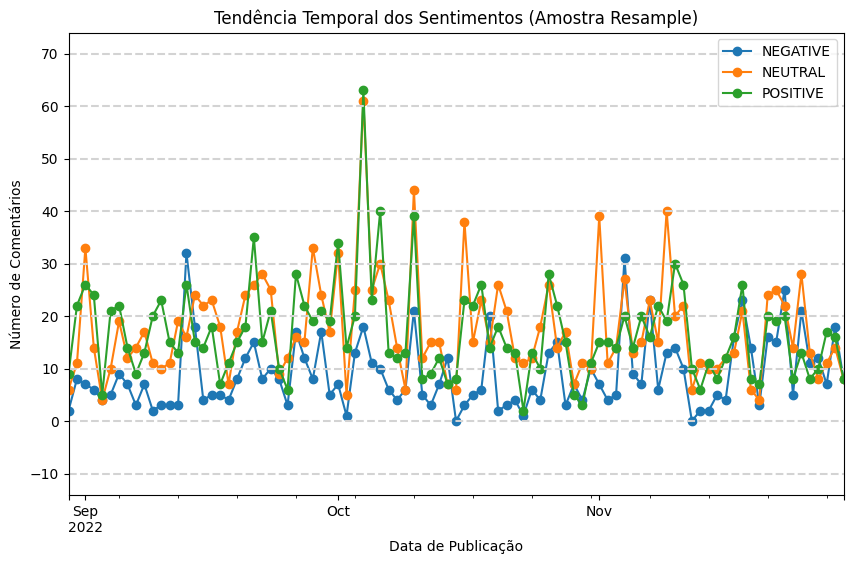

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar por data e sentimento e contar o número de ocorrências
data_sentimento_counts = graf_dados.groupby(['dataPublicada', 'sentimento']).size().unstack()

# Resample dos dados para uma frequência menor
data_sentimento_resampled = data_sentimento_counts.resample('1D').sum()  # Resample por intervalos de 7 dias, ajuste conforme necessário

# Criar uma figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico de linhas na figura
data_sentimento_resampled.plot(kind='line', marker='o', ax=ax)

# Configurar os rótulos dos eixos
ax.set_xlabel('Data de Publicação')
ax.set_ylabel('Número de Comentários')
ax.set_title('Tendência Temporal dos Sentimentos (Amostra Resample)')

# Remover valores NaN e Inf
data_sentimento_cleaned = data_sentimento_resampled.replace([np.inf, -np.inf], np.nan).dropna()
y_max = data_sentimento_cleaned.values.max()

# Traçar uma linha horizontal em cada marcação do eixo do número de comentários
for tick in ax.get_yticks():
    ax.axhline(tick, color='lightgray', linestyle='--')

# Definir os limites do eixo y
# ax.set_ylim(0, y_max + 2)

# Exibir a legenda
ax.legend()

# Exibir o gráfico
plt.show()


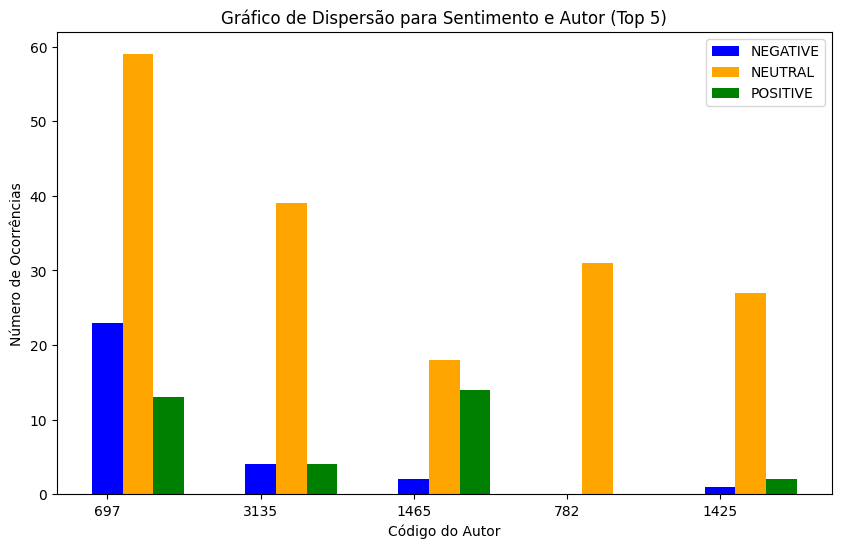

In [ ]:
# Agrupar por autor e sentimento e contar o número de ocorrências
autor_sentimento_counts = dados.groupby(['autor_anonimo', 'sentimento']).size().unstack()

# Calcular o número total de ocorrências de sentimentos por autor
autor_total_counts = autor_sentimento_counts.sum(axis=1)

# Selecionar os top 5 autores mais relevantes
top_autores = autor_total_counts.nlargest(5).index

# Filtrar o DataFrame original apenas para os top 5 autores
autor_sentimento_counts_top5 = autor_sentimento_counts.loc[top_autores]

# Obter os valores dos sentimentos
sentimentos = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

# Definir as cores para cada sentimento
cores = ['blue', 'orange', 'green']

# Criar uma figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Obter a quantidade de autores
quantidade_autores = len(top_autores)

# Definir a largura das barras
largura_barra = 0.2

# Definir a posição dos grupos de barras no eixo x
posicao_barras = range(quantidade_autores)

# Plotar as barras
for i, sentimento in enumerate(sentimentos):
    valores = autor_sentimento_counts_top5[sentimento]
    ax.bar(posicao_barras, valores, width=largura_barra, label=sentimento, color=cores[i])

    # Atualizar a posição das barras para o próximo grupo
    posicao_barras = [pos + largura_barra for pos in posicao_barras]

# Configurar os rótulos dos eixos
ax.set_xlabel('Código do Autor')
ax.set_ylabel('Número de Ocorrências')
ax.set_title('Gráfico de Dispersão para Sentimento e Autor (Top 5)')

# Definir os rótulos do eixo x
ax.set_xticks(range(quantidade_autores))
ax.set_xticklabels(top_autores)

# Exibir a legenda
ax.legend()

# Exibir o gráfico de barras
plt.show()

# Gráfico Word Cloud geral sem seleção de data

O gráfico de Word Cloud serve para visualizar de forma intuitiva as palavras mais frequentes em um conjunto de dados textuais. Ele ajuda a identificar os termos que aparecem com maior frequência e fornece uma representação visual das palavras mais relevantes. Isso pode ser útil para compreensão geral dos principais temas ou tópicos abordados nos comentários.

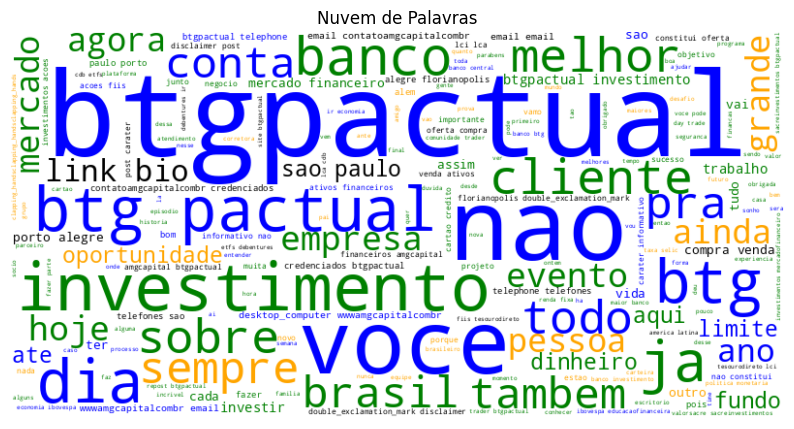

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir cores para cada sentimento
sentimento_cores = {
    'NEGATIVE': '#0000FF',  # Azul
    'NEUTRAL': '#FFA500',   # Laranja
    'POSITIVE': '#008000'   # Verde
}

# Definir cor padrão para palavras sem sentimento definido
cor_padrao = 'black'

# Definir cores personalizadas com base no sentimento
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentimento = dados.loc[dados['texto_normalizado'].str.contains(word), 'sentimento'].values
    if len(sentimento) > 0:
        sentimento = sentimento[0]
        return sentimento_cores.get(sentimento, cor_padrao)
    else:
        return cor_padrao

# Converter cada lista de tokens em uma string
textos = [' '.join(tokens) for tokens in tokens_processados]

# Concatenar todas as strings em uma única string
textos_concatenados = ' '.join(textos)

# Criar a Word Cloud com cores personalizadas
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_concatenados)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

# Gráfico de Word Cloud: Análise de Palavras Mais Frequentes em Comentários durante Período de Picos

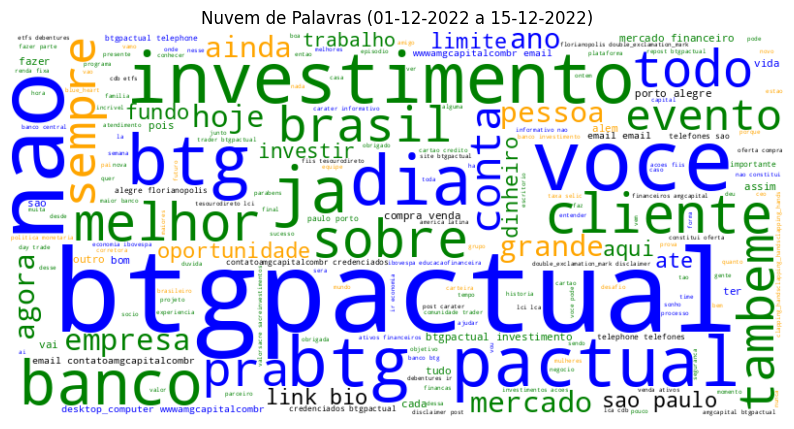

In [ ]:
#Gráfico Word Cloud a partir da datas com maiores picos de comentários
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Mapear os sentimentos para as cores correspondentes
sentimento_cores = {
    'NEGATIVE': '#0000FF',  # Azul
    'NEUTRAL': '#FFA500',   # Laranja
    'POSITIVE': '#008000'   # Verde
}

# Definir cor padrão para palavras sem sentimento definido
cor_padrao = 'black'

# Definir cores personalizadas com base no sentimento
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentimento = graf_dados.loc[graf_dados['texto_normalizado'].str.contains(word), 'sentimento'].values
    if len(sentimento) > 0:
        sentimento = sentimento[0]
        return sentimento_cores.get(sentimento, cor_padrao)
    else:
        return cor_padrao

# Converter a coluna 'dataPublicada' para o tipo datetime
graf_dados['dataPublicada'] = pd.to_datetime(graf_dados['dataPublicada'], format='%d-%m-%Y')

# Filtrar o DataFrame com base nas datas
data_inicio = pd.to_datetime('01-09-2022', format='%d-%m-%Y')
data_fim = pd.to_datetime('01-12-2022', format='%d-%m-%Y')
textos_filtrados = graf_dados[(graf_dados['dataPublicada'] >= data_inicio) & (graf_dados['dataPublicada'] <= data_fim)]['texto_normalizado']

# Concatenar os textos filtrados em uma única string
textos_concatenados = ' '.join(textos_filtrados)

# Processar o texto concatenado para gerar os tokens
stop_words = set(stopwords.words('portuguese'))
tokens_processados = [token for token in word_tokenize(textos_concatenados.lower()) if token not in stop_words]

# Converter os tokens processados de volta para uma string
textos_processados = ' '.join(tokens_processados)

# Criar a Word Cloud com cores personalizadas
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_processados)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras (01-12-2022 a 15-12-2022)')
plt.show()